<div style="text-align: right"><small>pierre-henri.wuillemin@lip6.fr<br/>git clone https://gitlab.lip6.fr/phw/projetMdC2018.git
<br/>last version : <b>11/04/2018</b><br/>2018-fev</small></div>
# 3i005 -Projet 3 - Chaîne de Markov - semaine 3

Le  but de cette semaine est l'étude expérimental des méthodes de calcul implémentées.

## Préambule technique
Le projet prendra la forme d'un ensemble de fichiers `python` (**python3**) et un rapport. Il utilisera fortement la programmation objet. Même si ce n'est pas forcément très _pythonesque_, on s'attachera à ce sujet à définir une classe dans un fichier de même nom (sauf si spécification contraire). 

Ce notebook (`semaine3.ipynb`) est normalement directement exécutable néanmoins, si vous le préférez, vous pouvez également recopier vos codes de test dans un fichier python classique `semaine3.py`. Si vous êtes y êtes habitués ou si vous voulez vous y habituer, n'hésitez pas à utiliser des _frameworks_ de test comme [`nosetest`](http://pythontesting.net/framework/nose/nose-introduction/) , etc. Le rapport devra bien évidemment contenir un préambule technique pour expliquer vos choix et la manière d'exécuter vos codes.

> L'énoncé du projet et les sources se trouvent dans le même repository gitlab. Il suffit donc de le mettre à jour :
> ```bash
> git pull
> ```

## Instrumentation de `CdMConvergence.py`

Afin de pouvoir étudier et comparer le comportement des 4 algorithmes, il est nécessaire de récupérer les données expérimentales pertinentes.
### Question 14

Enrichir ici le code de `CdMConvergence` afin de pouvoir récupérer les données expérimentales qui nous intéresse. En particulier (mais non exhaustivement, à vois de voir ce que vous voulez montrer en plus dans les comportements) :
1. la progression de la qualité de l'estimation en fonction des itérations d'un processus : il s'agit de pouvoir afficher des courbes de la diminution de $\epsilon$ (l'errur estimée) au cours des itérations. Ceci pour chacune des 3 méthodes itératives.
2. le temps de calcul et (si pertinent) le nombre d'itérations nécessaires pour obtenir la valeur de $\pi^*$ : il s'agit de pouvoir comparer le comportement des différents algorithmes en fonction de la taille de la chaîne de Markov étudié. Ceci pour les 4 méthodes.

> *Note* 
> 
> Récupérer un temps de calcul et un nombre d'itérations pour des processsus soumis à des aléas n'est pas aisé : on ne peut pas se contenter du calcul d'une valeur lors d'un unique **run**. En effet, la valeur sera bien plus robuste si on calcule plutôt la moyenne (et l'écart-type) sur > un grand nombre de **run**. Donc il s'agira de faire les calculs sur (par exemple) un nombre de **runs** paramétrés dans `CdmConvergence`. Un nombre classique est entre $20$ et $30$.

### Question 15

Discuter les résultats des différentes méthodes pour les Cdm :
> 1. MouseInMaze
> 2. MonoBestiole
> 3. PeriodiCdM dont le code se trouve dans `PeriodicCdM.py`

## Jeu de l'Oie généralisée

Afin de pouvoir faire des études en fonction de la taille $n$ de la chaîne de Markov, il nous faut définir un processus de génération de CdM de taille $n$. Nous proposons ici de généraliser le jeu de l'oie : `Oie(n)` où `n` sera le nombre de cases du jeu. Voici la définition que nous proposons de suivre :
#### Règle du jeu
* La carte du jeu de l'oie généralisée est composée de $n$ cases numérotés de $1$ à $n$. 
* Une partie commence à la case $1$. 
* À chaque tour, le joueur tire un dé à 6 faces et avance du nombre de cases indiqué par ce tirage. 
* Le jeu est terminée lorsque le joueur arrive sur la case $n$. Sur les dernières cases, le joueur *rebondit* sur la case $n$ si le tirage du dé lui fait dépasser la case $n$.
* Le jeu contient 3 types de cases piègées :
  1. les glissades : arriver sur un telle case fait faire un saut en arrière sur une case indiquée sur la carte.
  2. les tremplins : arriver sur une telle case fait faire un saut en avant sur une case indiquée sur la carte.
  3. les puits : arriver sur une telle case fait passer 2 tours au joueur.
  
Nous étudions ce jeu à $1$ joueur, car ce qui nous intéresse c'est le processus stochastique formée par la trajectoire du joueur sur la carte.

#### Construction d'un `Oie(n)`
La génération d'un jeu de l'oie de taille $n$ suivra ces principes :
1. Il y a une même probabilité $p$ qu'une case soit une glissade ou un tremplin.
2. Il y a une probabilité $q<p$ que la case soit un puits.
3. Seulement $1$ case sur $10$ (en moyenne) est piègée.
4. Le jeu ne contient pas de boucle (une case tremplin qui amène à une case glissage qui retourne à la case tremplin du départ).

### Question 15

Proposer dans `Oie.py` un CdM paramétré par `n`.

* Un `Oie(n)` est-il forcément une CdM à $n$ états ? 
* Afin que la CdM formée soit irréductible, on considérera une transition entre la case $n$ et la case $1$ de probabilité $1$ qui indiquera le commencement d'une nouvelle partie.
* D'autres paramètres peuvent être considérés. Par exemple : le nombre de face du dé ($d$), la valeur de $p$ et la valeur de $q$.

Afficher les graphes de quelques `Oie(20)`

### Question 16

Dans `CollTempsMoyen.py`, proposer un collecter `CollTempsMoyen(s)` pour calculer le temps moyen de premier retour dans l'état $s$. L'utiliser pour calculer le temps moyen d'une partie du jeu `Oie(n)`.

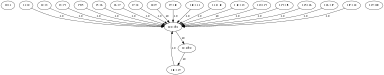

In [5]:
from Oie import Oie
import pyAgrum.lib.notebook as gnb

o = Oie(20,0.4,0.2)
o.show_transition_graph(gnb)

In [2]:
from CdMSampler import CdMSampler
s=CdMSampler(o)
from CollTempsMoyen import CollTempsMoyen
s.add_collector(CollTempsMoyen())
print(s.run(50))

{'nbr_iterations': 50, 'Nombre de retour vers debut': 0, 'Temps Moyen ': nan}


/home/arij/Desktop/S6/3I005/projetCdM2018/CollTempsMoyen.py:37: RuntimeWarning: Mean of empty slice
  return {"Nombre de retour vers debut": self.nb, "Temps Moyen ": np.nanmean(np.array(self.temps))}


### Question 16
(question ouverte)

Utiliser `Oie(n)` pour discuter du comportement et de la complexité expérimentale des différents algorithmes.

** Attention ** `Oie(n)` génère un jeu aléatoire de nombre de cases $n$. Il s'agira de prendre également en compte cet aléas. En particulier :
1. Chaque algorithme doit être testeé sur le même jeu de CdM : il ne s'agit pas de générer un ` Oie(n)` différent pour chaque algorithme.
2. A contrario, un résultat sur le nombre d'itération d'un algorithme pour `Oie(n)`  ne peut pas être effectué sur la base des résultats d'une unique instance de ` Oie(n)`.

La rédaction de cette question (courbes, analyses, etc.) sera importante dans le rapport

![Exemble de courbe 1](images/C1.png)
<div style="text-align: center"><small>--JUSTE UN EXEMPLE DE COURBE DE SUIVI DE CONVERGENCE--</small></div>

![Exemble de courbe 2](images/C2.png)
<div style="text-align: center"><small>--JUSTE UN EXEMPLE DE COURBE DE SUIVI DE COMPLEXITE POUR 3 ALGO--</small></div>